# <a id='toc1_'></a>[01 - 图片分类数据集](#toc0_)



**Table of contents**<a id='toc0_'></a>    
- [01 读取数据集](#toc1_1_)    
  - [(1) 下载dataset](#toc1_1_1_)    
  - [(2) 获取MINST的数据标签](#toc1_1_2_)    
  - [(3) DataLoader 读取dataset中的数据](#toc1_1_3_)    
    - [(a) 使用python进行batch读取(next / iter)](#toc1_1_3_1_)    
    - [(b) 使用torch中内置的迭代器进行读取](#toc1_1_3_2_)    
- [02 整合所有组件](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

In [2]:
d2l.use_svg_display()

## <a id='toc1_1_'></a>[01 读取数据集](#toc0_)

### <a id='toc1_1_1_'></a>[(1) 下载dataset](#toc0_)

In [3]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", train=False, transform=trans, download=True)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [4]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [5]:
type(mnist_test) # 读取出的时候是dataset类型，需要后续使用dataloader进行处理

torchvision.datasets.mnist.FashionMNIST

### <a id='toc1_1_2_'></a>[(2) 获取MINST的数据标签](#toc0_)

In [6]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [7]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

### <a id='toc1_1_3_'></a>[(3) DataLoader 读取dataset中的数据](#toc0_)

#### <a id='toc1_1_3_1_'></a>[(a) 使用python进行batch读取(next / iter)](#toc0_)

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

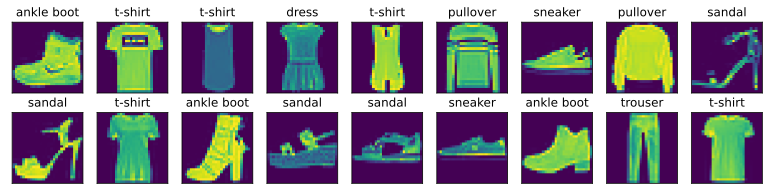

In [8]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18))) # 一个batch_size中有18个图片
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y)) # 一个batch中18个图片，每个图片大小为28*28，展示方式为2排9列

In [9]:
X.shape # X中有18张图片，每个图片的大小为[1, 28, 28]

torch.Size([18, 1, 28, 28])

#### <a id='toc1_1_3_2_'></a>[(b) 使用torch中内置的迭代器进行读取](#toc0_)

In [10]:
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [11]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'5.35 sec'

## <a id='toc1_2_'></a>[02 整合所有组件](#toc0_)

In [13]:
def load_data_fashion_mnist(batch_size, resize=None):  # @save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,num_workers=get_dataloader_workers()))


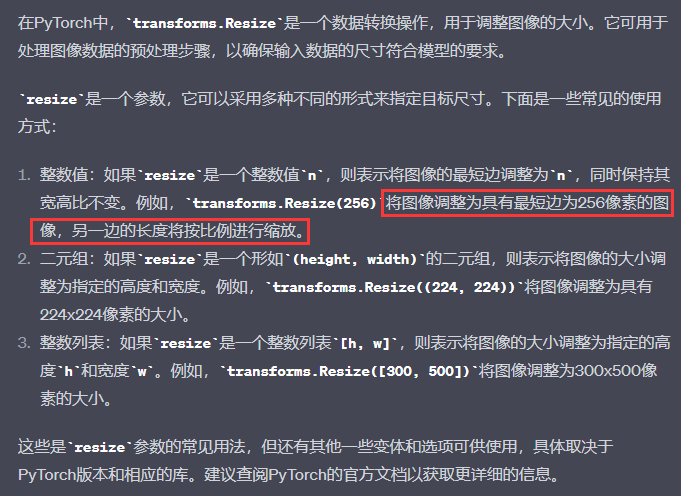

In [14]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [15]:
X.shape

torch.Size([32, 1, 64, 64])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

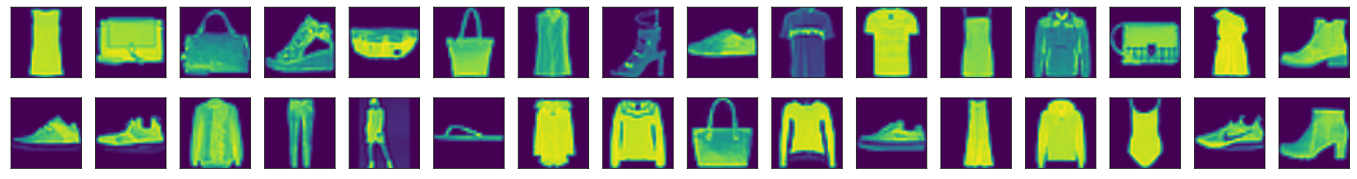

In [17]:
show_images(X.reshape(32, 64, 64), 2, 16)

`transforms.Resize(64)`可以用于将FashionMNIST数据集中的图像大小调整为64x64。尽管FashionMNIST数据集中的原始图像大小是28x28像素，但`transforms.Resize`在调整大小时会按照指定的大小进行插值处理。

在这种情况下，由于目标大小为64x64，`transforms.Resize(64)`会根据图像的宽高比进行等比例缩放，使得较长的一边调整为64像素。然后，它会使用插值算法（例如双线性插值）来填充和平滑图像，以适应目标大小。

需要注意的是，将28x28像素的图像调整为64x64像素的大小可能会导致图像细节的损失，因为在插值过程中会引入一些平滑和模糊化。这种调整大小操作通常在数据预处理阶段用于使图像具有一致的大小，以适应模型的输入要求。